In [ ]:
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data_one = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/usnews.data')
data_one.columns = ['FICE', 'College name', 'Postal code', 'Public/Private', 'Average Math SAT score', 'Average Verbal SAT score', 'Average Combined SAT score', 'Average ACT score', 'First quartile - Math SAT', 'Third quartile - Math SAT', 'First quartile - Verbal SAT', 'Third quartile - Verbal SAT', 'First quartile - ACT', 'Third quartile - ACT', 'Number of applications received','Number of applicants accepted', 'Number of new students enrolled', 'Pct. new students from top 10% of H.S. class', 'Pct. new students from top 25% of H.S. class', 'Number of fulltime undergraduates', 'Number of parttime undergraduates', 'In-state tuition', 'Out-of-state tuition', 'Room and board costs', 'Room costs', 'Board costs', 'Additional fees', 'Estimated book costs', 'Estimated personal spending', 'Pct. of faculty with Ph.D.s', 'Pct. of faculty with terminal degree', 'Student/faculty ratio', 'Pct.alumni who donate', 'Instructional expenditure per student', 'Graduation rate']
data_two = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/aaup.data')
data_two.columns = ['FICE', 'College name', 'Postal code', 'Type', 'Average salary - full professors', 'Average salary - associate professors', 'Average salary - assistant professors', 'Average salary - all ranks', 'Average compensation - full professors', 'Average compensation - associate professors', 'Average compensation - assistant professors', 'Average compensation - all ranks', 'Number of full professors', 'Number of associate professors', 'Number of assistant professors', 'Number of instructors', 'Number of faculty - all ranks']

Question A. How do the increase in salaries of faculty members vary by academic rank, such as professors, associate professors, assistant professors, and instructors?


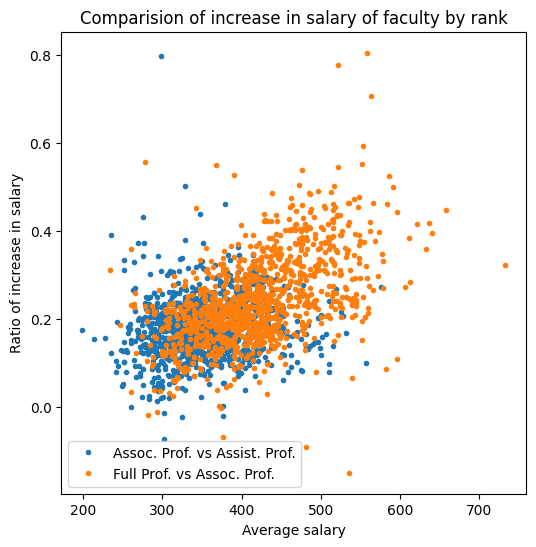

In [ ]:
col = ['Average salary - full professors', 'Average salary - associate professors', 'Average salary - assistant professors']
aaup = data_two
for i in col:
  aaup = aaup[aaup[i] != '*']

diff_one = (aaup['Average salary - associate professors'].astype(int) - aaup['Average salary - assistant professors'].astype(int))/(aaup['Average salary - assistant professors'].astype(int))
diff_two = (aaup['Average salary - full professors'].astype(int) - aaup['Average salary - associate professors'].astype(int))/(aaup['Average salary - associate professors'].astype(int))
plt.figure(figsize = (6, 6))
plt.plot(aaup['Average salary - assistant professors'].astype(int), diff_one, '.')
plt.plot(aaup['Average salary - associate professors'].astype(int), diff_two, '.')
plt.xlabel('Average salary')
plt.ylabel('Ratio of increase in salary')
plt.title('Comparision of increase in salary of faculty by rank')
plt.legend(['Assoc. Prof. vs Assist. Prof.', 'Full Prof. vs Assoc. Prof.'])

<Axes: title={'center': 'Mean of salaries of faculty by rank'}, xlabel='Rank of faculty', ylabel='Mean Salary'>

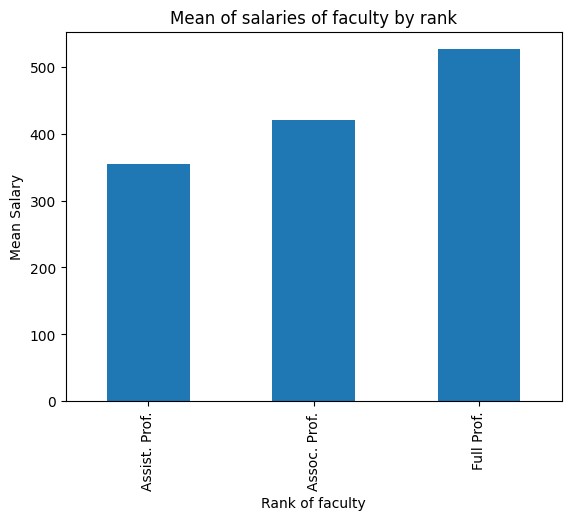

In [ ]:
assistmeans = aaup['Average salary - assistant professors'].astype(int).mean()
assocmeans = aaup['Average salary - associate professors'].astype(int).mean()
profmeans = aaup['Average salary - full professors'].astype(int).mean()
meansalary = pd.Series([assistmeans, assocmeans, profmeans], index = ['Assist. Prof.', 'Assoc. Prof.', 'Full Prof.'])
meansalary.plot(kind = 'bar', xlabel = 'Rank of faculty', ylabel = 'Mean Salary', title = 'Mean of salaries of faculty by rank')


Question B. Acceptance rate

     FICE              College name Postal code  Public/Private  \
749  6964  Rutgers at New Brunswick          NJ               1   

    Average Math SAT score Average Verbal SAT score  \
749                    594                      513   

    Average Combined SAT score Average ACT score First quartile - Math SAT  \
749                       1107                 *                       530   

    Third quartile - Math SAT  ... Board costs Additional fees  \
749                       660  ...        1986            1003   

    Estimated book costs Estimated personal spending  \
749                  690                        2009   

    Pct. of faculty with Ph.D.s Pct. of faculty with terminal degree  \
749                          90                                   95   

    Student/faculty ratio Pct.alumni who donate  \
749                  19.5                    19   

    Instructional expenditure per student Graduation rate  
749                                 10474  

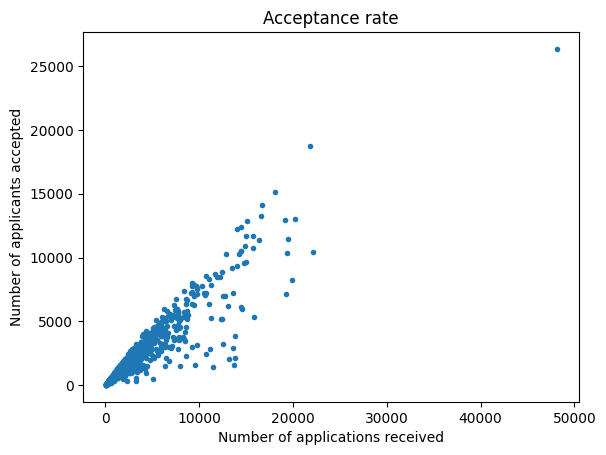

In [ ]:
cols = ['Number of applications received', 'Number of applicants accepted']
usnews = data_one
for i in cols:
  usnews = usnews[usnews[i] != '*']

plt.plot(usnews['Number of applications received'].astype(int), usnews['Number of applicants accepted'].astype(int), '.')
plt.xlabel('Number of applications received')
plt.ylabel('Number of applicants accepted')
plt.title('Acceptance rate')
print(usnews[usnews['Number of applications received'].astype(int)>40000])

<Axes: ylabel='Density'>

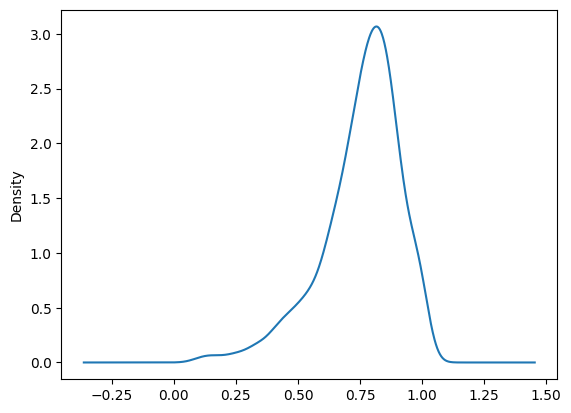

In [ ]:
rate = (usnews['Number of applicants accepted'].astype(int))/(usnews['Number of applications received'].astype(int))
rate.plot(kind='kde')

Question C. Number of students rejecting applications

Text(0.5, 1.0, 'Students rejecting acceptance')

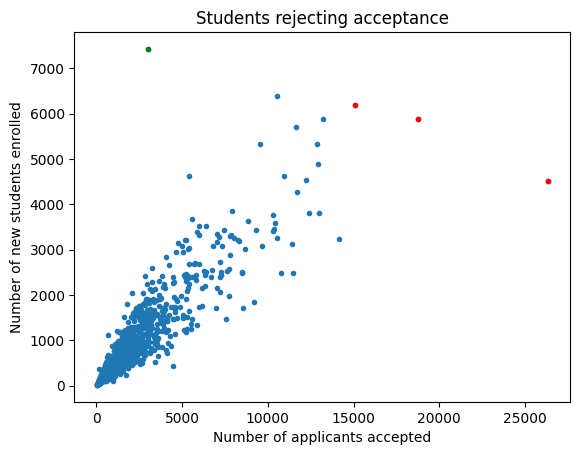

In [ ]:
colu = ['Number of applicants accepted', 'Number of new students enrolled']
usnews = data_one
for i in colu:
  usnews = usnews[usnews[i] != '*']

y1 = usnews[usnews['Number of new students enrolled'].astype(int)>7000]
x1 = usnews[usnews['Number of applicants accepted'].astype(int)>15000]
plt.plot(usnews['Number of applicants accepted'].astype(int), usnews['Number of new students enrolled'].astype(int), '.')
plt.plot(x1['Number of applicants accepted'].astype(int), x1['Number of new students enrolled'].astype(int), 'r.')
plt.plot(y1['Number of applicants accepted'].astype(int), y1['Number of new students enrolled'].astype(int), 'g.')
plt.xlabel('Number of applicants accepted')
plt.ylabel('Number of new students enrolled')
plt.title('Students rejecting acceptance')
#plt.xlim(0, 30000)
#plt.ylim(0, 30000)
#plt.show()

<Axes: ylabel='Density'>

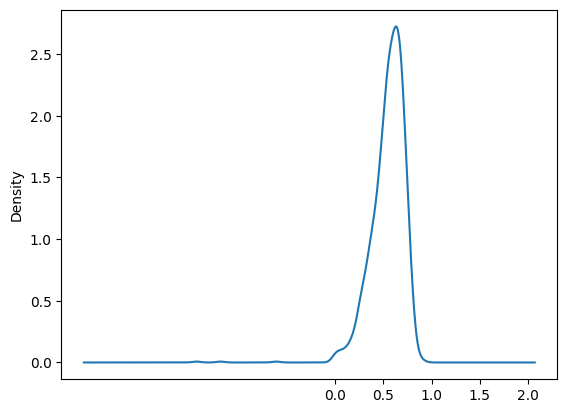

In [ ]:
r_rate =1 - ((usnews['Number of new students enrolled'].astype(int))/(usnews['Number of applicants accepted'].astype(int)))
r_rate.plot(kind = 'kde',xticks =np.linspace(0,2,5))

Question D. 

Text(0.5, 1.0, 'Graduation of students')

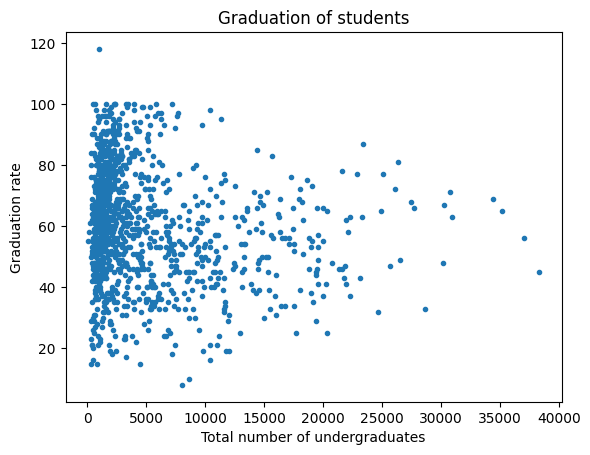

In [ ]:
colum = ['Number of fulltime undergraduates', 'Number of parttime undergraduates', 'Graduation rate']
usnews = data_one
for i in colum:
  usnews = usnews[usnews[i] != '*']

total_ug = usnews['Number of fulltime undergraduates'].astype(int) + usnews['Number of parttime undergraduates'].astype(int)
plt.plot(total_ug, usnews['Graduation rate'].astype(int), '.')
plt.xlabel('Total number of undergraduates')
plt.ylabel('Graduation rate')
plt.title('Graduation of students')

<Axes: ylabel='Density'>

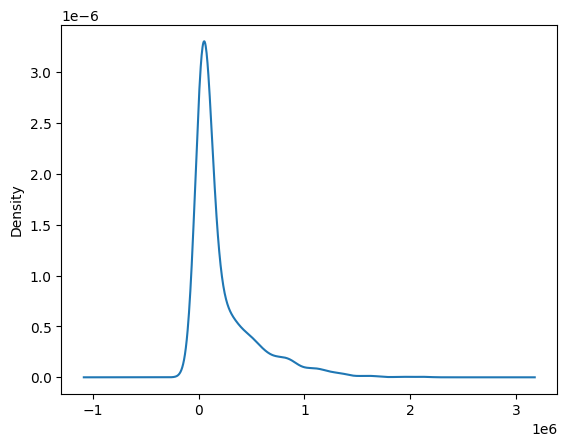

In [ ]:
fail = total_ug*(100-usnews['Graduation rate'].astype(int))
fail.plot(kind = 'kde')

Question E.

     FICE            College name Postal code  Public/Private  \
606  2506  Saint Louis University          MO               2   

    Average Math SAT score Average Verbal SAT score  \
606                      *                        *   

    Average Combined SAT score Average ACT score First quartile - Math SAT  \
606                          *                 *                       480   

    Third quartile - Math SAT  ... Board costs Additional fees  \
606                       620  ...        2430              80   

    Estimated book costs Estimated personal spending  \
606                  800                        6800   

    Pct. of faculty with Ph.D.s Pct. of faculty with terminal degree  \
606                          84                                   94   

    Student/faculty ratio Pct.alumni who donate  \
606                   4.6                    19   

    Instructional expenditure per student Graduation rate  
606                                 18367      

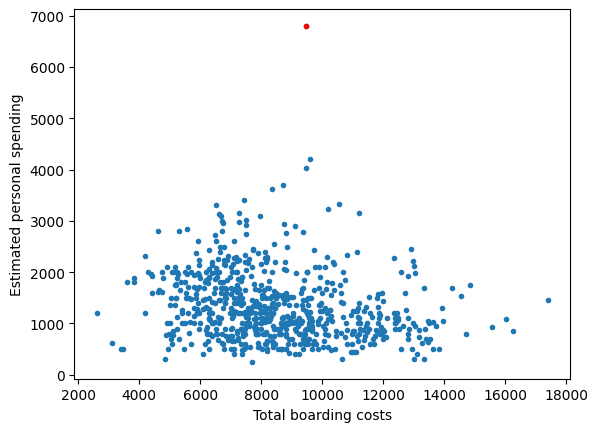

In [ ]:
column = ['Room and board costs', 'Room costs', 'Board costs', 'Estimated personal spending']
usnews = data_one
for i in column:
  usnews = usnews[usnews[i] != '*']

totalcost = usnews['Room and board costs'].astype(int) + usnews['Room costs'].astype(int) + usnews['Board costs'].astype(int)
rich = usnews[usnews['Estimated personal spending'].astype(int)>5000]
plt.plot( totalcost, usnews['Estimated personal spending'].astype(int), '.') 
plt.plot(rich['Room and board costs'].astype(int) + rich['Room costs'].astype(int) + rich['Board costs'].astype(int), rich['Estimated personal spending'].astype(int), 'r.')
plt.xlabel('Total boarding costs')
plt.ylabel('Estimated personal spending')
print(rich)

Question F. Fee structure comparision for public and private in state and out state 

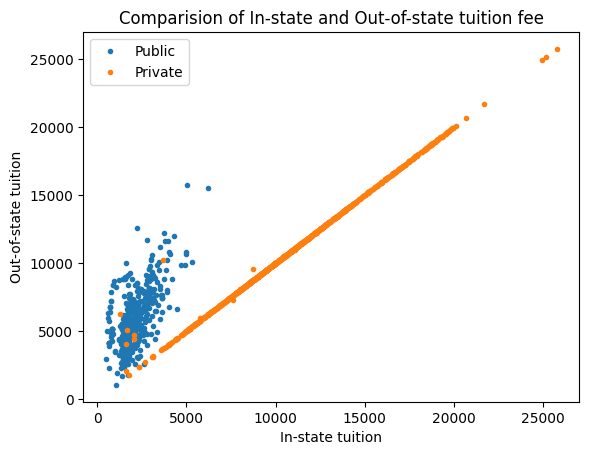

In [ ]:
colms = ['Public/Private', 'In-state tuition', 'Out-of-state tuition']
usnews = data_one
for i in colms:
  usnews = usnews[usnews[i] != '*']

public = usnews[usnews['Public/Private']==1]
private = usnews[usnews['Public/Private']==2]
plt.plot(public['In-state tuition'].astype(int), public['Out-of-state tuition'].astype(int), '.')
plt.plot(private['In-state tuition'].astype(int), private['Out-of-state tuition'].astype(int), '.')
plt.xlabel('In-state tuition')
plt.ylabel('Out-of-state tuition')
plt.title('Comparision of In-state and Out-of-state tuition fee')
plt.legend(['Public', 'Private'])

Question G. 

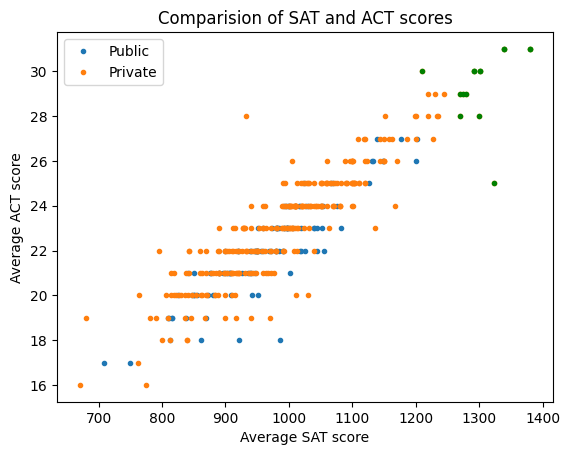

In [ ]:
colns = ['Average Combined SAT score', 'Average ACT score']
for i in colns:
  public = public[public[i] != '*']
  private = private[private[i] != '*']
good = private[private['Average ACT score'].astype(int)>=30.0]
good_two = private[private['Average Combined SAT score'].astype(int)>1250]
plt.plot(public['Average Combined SAT score'].astype(int), public['Average ACT score'].astype(float), '.')
plt.plot(private['Average Combined SAT score'].astype(int), private['Average ACT score'].astype(float), '.')
plt.plot(good['Average Combined SAT score'].astype(int), good['Average ACT score'].astype(int), 'g.')
plt.plot(good_two['Average Combined SAT score'].astype(int), good_two['Average ACT score'].astype(int), 'g.')
plt.xlabel('Average SAT score')
plt.ylabel('Average ACT score')
plt.title('Comparision of SAT and ACT scores')
plt.legend(['Public', 'Private'])

In [ ]:
from IPython.display import display

display(good_two)

,FICE,College name,Postal code,Public/Private,Average Math SAT score,Average Verbal SAT score,Average Combined SAT score,Average ACT score,First quartile - Math SAT,Third quartile - Math SAT,...,Board costs,Additional fees,Estimated book costs,Estimated personal spending,Pct. of faculty with Ph.D.s,Pct. of faculty with terminal degree,Student/faculty ratio,Pct.alumni who donate,Instructional expenditure per student,Graduation rate
75,1170,Claremont McKenna College,CA,2,670,600,1270,28,620,720,...,2850,140,500,850,99,99,9.6,52,18443,87
78,1173,Pomona College,CA,2,700,640,1340,31,650,730,...,*,180,800,1000,94,98,8.9,47,20682,91
151,1424,Wesleyan University,CT,2,660,620,1280,29,610,710,...,2310,660,1400,1400,90,94,12.1,39,16262,92
307,1739,Northwestern University,IL,2,670,600,1270,29,610,720,...,*,*,759,1585,96,100,6.8,25,26385,92
431,2115,Amherst College,MA,2,685,639,1324,25,640,740,...,2650,272,660,1598,93,98,8.4,63,21424,100
454,2178,Massachusetts Institute of Technology,MA,2,742,639,1381,31,720,780,...,2775,600,725,1600,99,99,10.1,35,33541,94
494,2077,Johns Hopkins University,MD,2,686,606,1292,30,660,740,...,2925,*,500,1040,96,97,3.3,38,56233,90
653,2920,Duke University,NC,2,687,615,1302,30,640,740,...,2954,480,625,1162,95,96,5.0,44,27206,97
1023,3378,University of Pennsylvania,PA,2,680,594,1274,29,640,730,...,3570,1836,500,1544,95,96,6.3,38,25765,93
1039,3401,Brown University,RI,2,680,620,1300,28,640,730,...,2352,650,720,1100,99,100,7.6,39,20440,97


Question H. Is there a relationship between a college's instructional expenditure per student and its graduation rate, and does this relationship differ for public versus private colleges?


36704


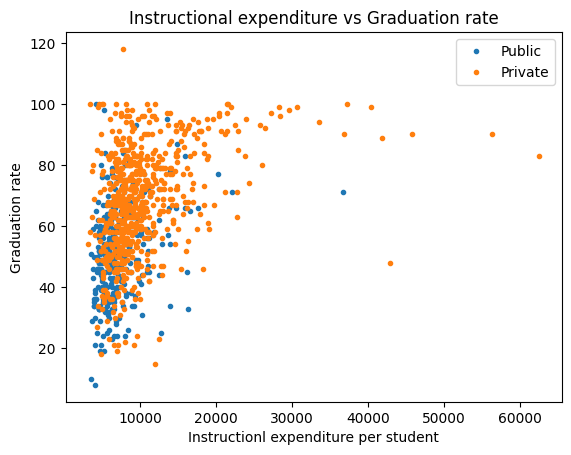

In [ ]:
c = ['Instructional expenditure per student', 'Graduation rate']
for i in c:
  public = public[public[i] != '*']
  private = private[private[i] != '*']
print(public['Instructional expenditure per student'].astype(int).max())
plt.plot(public['Instructional expenditure per student'].astype(int), public['Graduation rate'].astype(int), '.')
plt.plot(private['Instructional expenditure per student'].astype(int), private['Graduation rate'].astype(int), '.')
plt.xlabel('Instructionl expenditure per student')
plt.ylabel('Graduation rate')
plt.title('Instructional expenditure vs Graduation rate')
plt.legend(['Public', 'Private'])

Question I. Distribution of public and private universities across the US. Comparing it with the amount of tax spent on education area wise. 

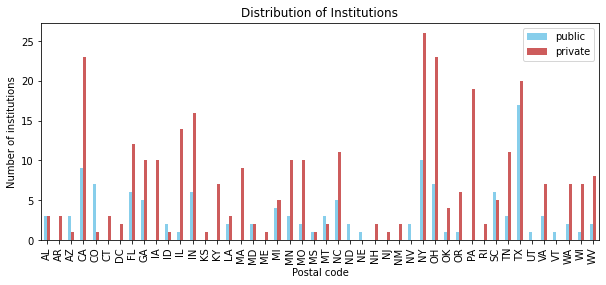

In [ ]:
co = ['Postal code']
for i in co:
  public = public[public[i] != '*']
  private = private[private[i] != '*']

public_inst = public.groupby('Postal code').size()
private_inst = private.groupby('Postal code').size()

df = pd.DataFrame({"public":public_inst, "private":private_inst})
ax = df.plot.bar(figsize = [10, 4], color=["SkyBlue", "IndianRed"], rot = 90, title = "Distribution of Institutions", ylabel = 'Number of institutions')
plt.show()

Questions J. Are there any colleges in the dataset that have significantly higher or lower graduation rates than would be expected based on their average combined SAT score and student/faculty ratio?

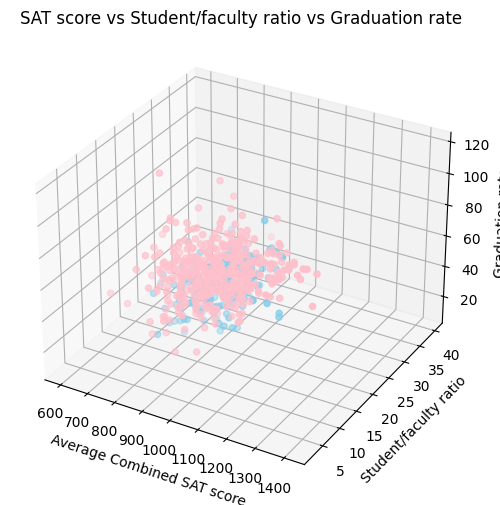

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
cols = ['Average Combined SAT score', 'Student/faculty ratio', 'Graduation rate']
for i in cols:
   public = public[public[i] != '*']
   private = private[private[i] != '*']
fig = plt.figure(figsize=(6, 6))
threedee = plt.axes(projection='3d')
threedee.scatter(public['Average Combined SAT score'].astype(float), public['Student/faculty ratio'].astype(float), public['Graduation rate'].astype(float), color='SkyBlue')
threedee.scatter(private['Average Combined SAT score'].astype(float), private['Student/faculty ratio'].astype(float), private['Graduation rate'].astype(float), color='pink')
threedee.set_xlabel('Average Combined SAT score')
threedee.set_ylabel('Student/faculty ratio')
threedee.set_zlabel('Graduation rate')
threedee.set_title('SAT score vs Student/faculty ratio vs Graduation rate')
plt.show()

Text(0, 0.5, 'Graduation rate')

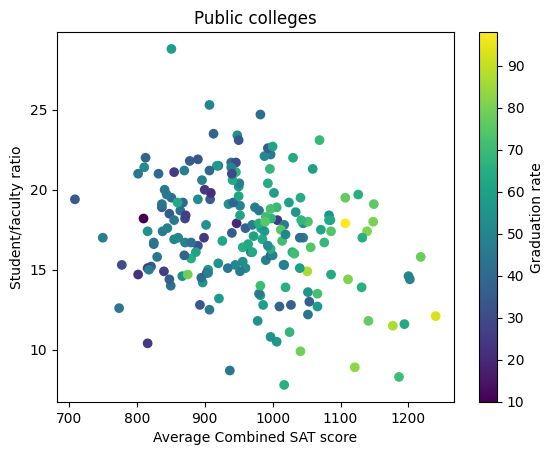

In [ ]:
fig, ax = plt.subplots()
graph = ax.scatter(public['Average Combined SAT score'].astype(float), public['Student/faculty ratio'].astype(float), c=public['Graduation rate'].astype(float))
var_three = fig.colorbar(graph)
ax.set_xlabel('Average Combined SAT score')
ax.set_ylabel('Student/faculty ratio')
ax.set_title('Public colleges')
var_three.ax.set_ylabel('Graduation rate')

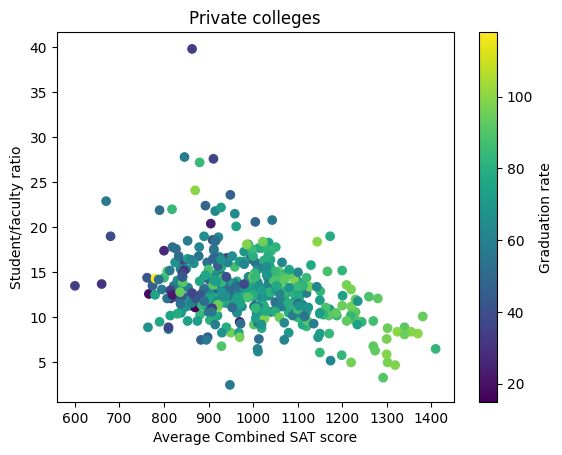

In [ ]:
fig, ax = plt.subplots()
graph = ax.scatter(private['Average Combined SAT score'].astype(float), private['Student/faculty ratio'].astype(float), c=private['Graduation rate'].astype(float))
var_three = fig.colorbar(graph)
ax.set_xlabel('Average Combined SAT score')
ax.set_ylabel('Student/faculty ratio')
ax.set_title('Private colleges')
var_three.ax.set_ylabel('Graduation rate')
plt.show()

Question K. How does good faculty and good faculty ratio contribute to good alumni donation? i.e. are students happy with the colllege after graduating?

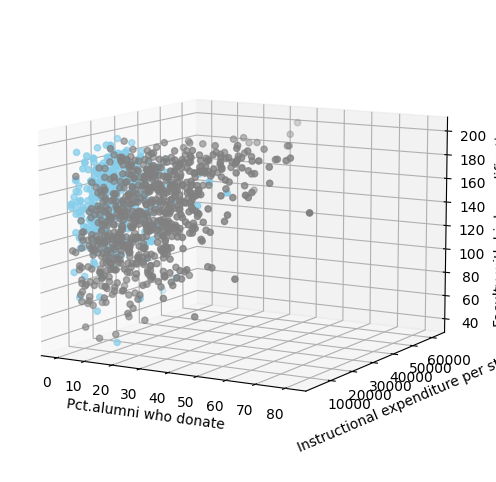

In [ ]:
usnews = data_one
colms = ['Public/Private',]
for i in colms:
  usnews = usnews[usnews[i] != '*']
public = usnews[usnews['Public/Private']==1]
private = usnews[usnews['Public/Private']==2]
c = ['Pct.alumni who donate', 'Pct. of faculty with terminal degree', 'Pct. of faculty with Ph.D.s', 'Instructional expenditure per student']
for i in c:
   public = public[public[i] != '*']
   private = private[private[i] != '*']
faculty_pub = public['Pct. of faculty with terminal degree'].astype(float) + public['Pct. of faculty with Ph.D.s'].astype(float)
faculty_priv = private['Pct. of faculty with terminal degree'].astype(float) + private['Pct. of faculty with Ph.D.s'].astype(float)
fig = plt.figure(figsize=(6, 6))
threedee = plt.axes(projection='3d')
threedee.scatter(public['Pct.alumni who donate'].astype(float), public['Instructional expenditure per student'].astype(float), faculty_pub, color='SkyBlue')
threedee.scatter(private['Pct.alumni who donate'].astype(float), private['Instructional expenditure per student'].astype(float), faculty_priv, color='gray')
threedee.set_xlabel('Pct.alumni who donate')
threedee.set_ylabel('Instructional expenditure per student')
threedee.set_zlabel('Faculty with high qualification')
threedee.view_init(elev = 10.)
plt.show()

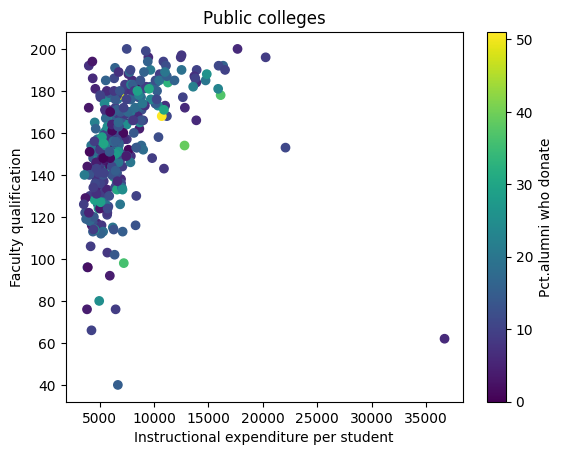

In [ ]:
fig, ax = plt.subplots()
graph = ax.scatter(public['Instructional expenditure per student'].astype(float), faculty_pub, c=public['Pct.alumni who donate'].astype(float))
var_three = fig.colorbar(graph)
ax.set_xlabel('Instructional expenditure per student')
ax.set_ylabel('Faculty qualification')
ax.set_title('Public colleges')
var_three.ax.set_ylabel('Pct.alumni who donate')
plt.show()

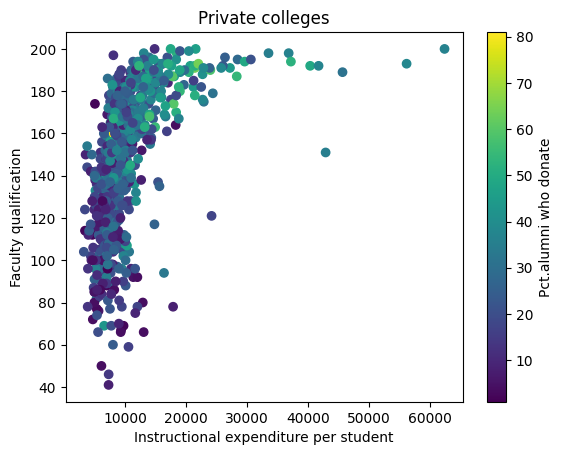

In [ ]:
fig, ax = plt.subplots()
graph = ax.scatter(private['Instructional expenditure per student'].astype(float), faculty_priv, c=private['Pct.alumni who donate'].astype(float))
var_three = fig.colorbar(graph)
ax.set_xlabel('Instructional expenditure per student')
ax.set_ylabel('Faculty qualification')
ax.set_title('Private colleges')
var_three.ax.set_ylabel('Pct.alumni who donate')
plt.show()

Question L. Comparision of faculty distribution and salary distribution and compensation distribution

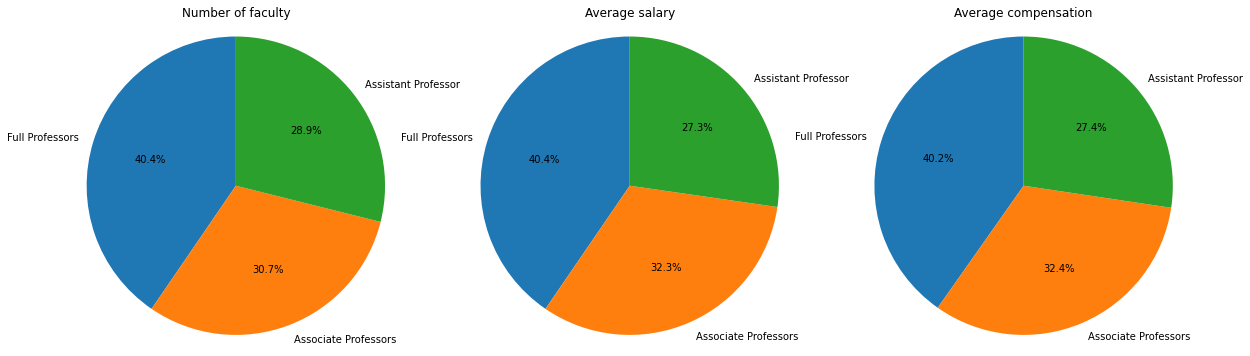

In [ ]:
col = ['Average salary - full professors', 'Average salary - associate professors', 'Average salary - assistant professors', 'Average compensation - full professors', 'Average compensation - associate professors', 'Average compensation - assistant professors', 'Number of full professors', 'Number of associate professors', 'Number of assistant professors']
aaup = data_two
for i in col:
  aaup = aaup[aaup[i] != '*']

profmean_n = aaup['Number of full professors'].astype(int).mean()
assocmean_n = aaup['Number of associate professors'].astype(int).mean()
assistmean_n = aaup['Number of assistant professors'].astype(int).mean()

profmean_c = aaup['Average compensation - full professors'].astype(int).mean()
assocmean_c = aaup['Average compensation - associate professors'].astype(int).mean()
assistmean_c = aaup['Average compensation - assistant professors'].astype(int).mean()

mean_sal = [profmeans, assocmeans, assistmeans]
mean_n = [profmean_n, assocmean_n, assistmean_n]
mean_c = [profmean_c, assocmean_c, assistmean_c]

labels = 'Full Professors', 'Associate Professors', 'Assistant Professor'

plt.figure(figsize = (20, 6))
plt.subplot(131)
plt.pie(mean_n, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
plt.title('Number of faculty')

plt.subplot(132)
plt.pie(mean_sal, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
plt.title('Average salary')

plt.subplot(133)
plt.pie(mean_c, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
plt.title('Average compensation')

plt.show()